In [1]:
import joblib
import pandas as pd
import numpy as np
import shap
from pathlib import Path
from sklearn.model_selection import train_test_split


In [2]:
DATA_PATH = Path("data/churn.csv")
MODEL_PATH = Path("models/churn_xgb_pipeline.joblib")

df = pd.read_csv(DATA_PATH)
drop_cols = ["RowNumber", "CustomerId", "Surname"]
X = df.drop(columns=drop_cols + ["Exited"], errors="ignore")
y = df["Exited"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [3]:
pipe = joblib.load(MODEL_PATH)
preprocess = pipe.named_steps["preprocess"]
model = pipe.named_steps["model"]

X_train_enc = preprocess.transform(X_train)
X_test_enc = preprocess.transform(X_test)
feature_names = preprocess.get_feature_names_out()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_enc)


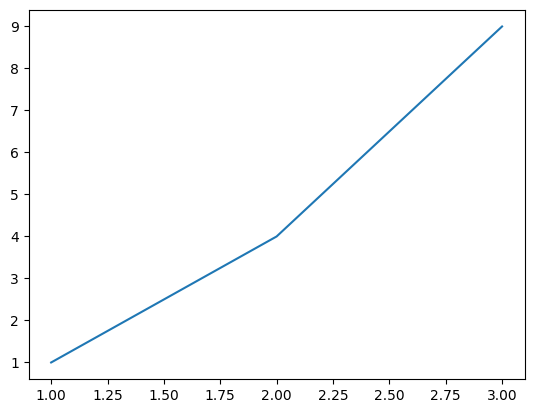

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],[1,4,9])
plt.show()


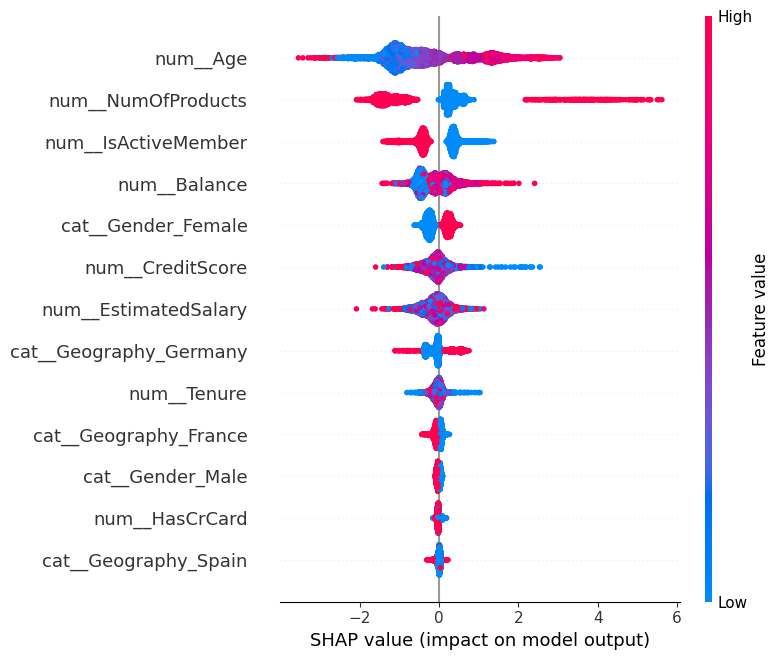

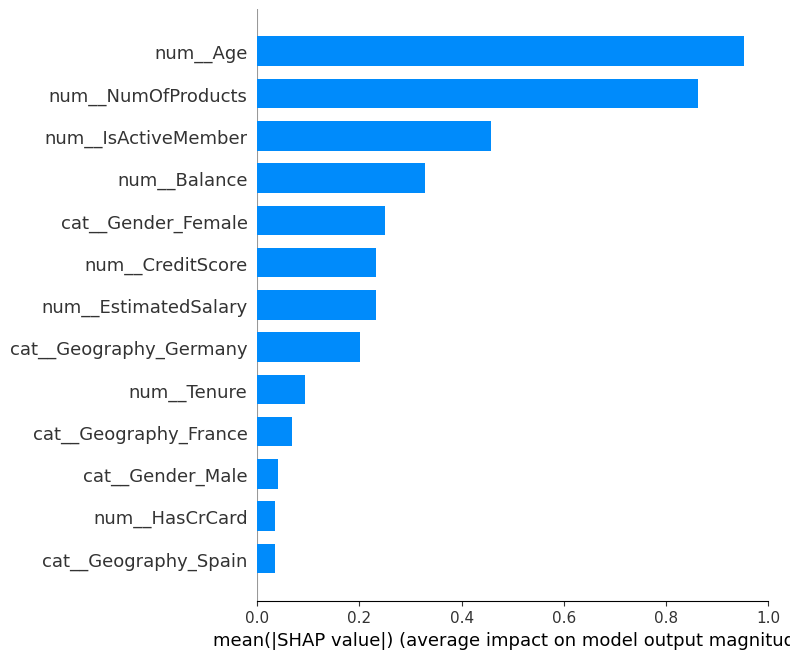

In [5]:
shap.summary_plot(shap_values, X_train_enc, feature_names=feature_names)
shap.summary_plot(shap_values, X_train_enc, feature_names=feature_names, plot_type="bar")


In [9]:
import sys
print(sys.executable)


C:\Users\baxiu\miniconda3\envs\bank-churn\python.exe


In [11]:
import sys
!"{sys.executable}" -m pip install -U matplotlib


In [12]:
import matplotlib
print(matplotlib.__version__)


3.10.8


Wybrany klient (index w X_test): 182


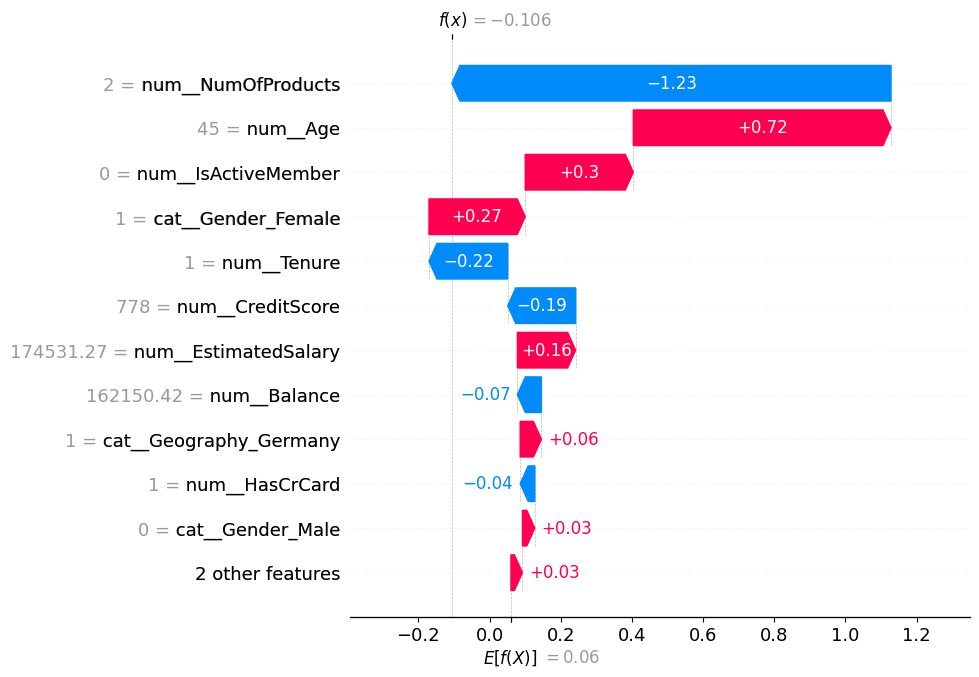

In [3]:
import joblib
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split

# ścieżki
DATA_PATH = Path("data/churn.csv")
MODEL_PATH = Path("models/churn_xgb_pipeline.joblib")

# dane
df = pd.read_csv(DATA_PATH)
drop_cols = ["RowNumber", "CustomerId", "Surname"]
X = df.drop(columns=drop_cols + ["Exited"], errors="ignore")
y = df["Exited"].astype(int)

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# model pipeline
pipe = joblib.load(MODEL_PATH)
preprocess = pipe.named_steps["preprocess"]
model = pipe.named_steps["model"]

# transform
X_test_enc = preprocess.transform(X_test)
feature_names = preprocess.get_feature_names_out()

# wybór klienta
i = np.random.randint(0, X_test_enc.shape[0])
x_one = X_test_enc[i:i+1]
print("Wybrany klient (index w X_test):", X_test.index[i])

# SHAP
explainer = shap.TreeExplainer(model)
sv = explainer(x_one)

# waterfall - jeśli jest multi-class, wybierz klasę 1
# (czasem sv.values ma 3 wymiary)
if len(sv.values.shape) == 3:
    explanation = shap.Explanation(
        values=sv.values[0, :, 1],
        base_values=sv.base_values[0, 1],
        data=x_one[0],
        feature_names=feature_names
    )
else:
    explanation = shap.Explanation(
        values=sv.values[0],
        base_values=sv.base_values[0],
        data=x_one[0],
        feature_names=feature_names
    )

shap.plots.waterfall(explanation, max_display=12)
plt.show()
